In [1]:
import numpy as np
import pandas as pd

In [2]:
#as it is utf-8
df=pd.read_csv("spam (1).csv",encoding="latin1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# Data Cleaning

In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
#removing columns majorly having null values
df=df[["v1","v2"]]

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.rename(columns={"v1":"Target","v2":"message"},inplace=True)

C:\Users\ABHISHEK RAWAL\AppData\Local\Temp\ipykernel_4100\670948255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"v1":"Target","v2":"message"},inplace=True)


In [8]:
#Labeling the Target columns as ham(not spam) as 0,and spam as 1
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Target"]=le.fit_transform(df["Target"])

C:\Users\ABHISHEK RAWAL\AppData\Local\Temp\ipykernel_4100\1054718051.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Target"]=le.fit_transform(df["Target"])


In [9]:
df

,Target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
df.duplicated().sum()

403

In [11]:
#dropping duplicate rows
df=df.drop_duplicates(keep="first")

In [12]:
df.duplicated().sum()

0

# EDA

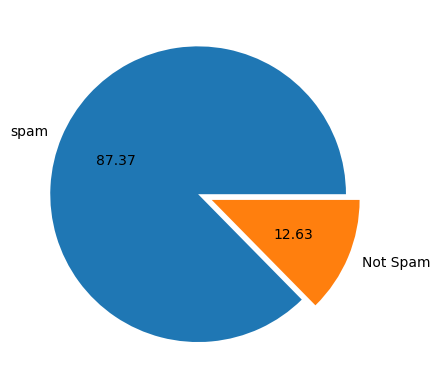

In [13]:
import matplotlib.pyplot as plt
plt.pie(df["Target"].value_counts(),labels=["spam","Not Spam"],autopct="%.2f",explode=[0,0.1])
plt.show()

In [14]:
#extracting number of characters in every message
df["char"]=df["message"].apply(len)

C:\Users\ABHISHEK RAWAL\AppData\Local\Temp\ipykernel_4100\2380701123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["char"]=df["message"].apply(len)


In [15]:
import nltk
from nltk import word_tokenize,sent_tokenize
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\ABHISHEK
[nltk_data]     RAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
#extracting words and sentences from every message
df["words"]=df["message"].apply(lambda x: len(word_tokenize(x)))
df["sentence"]=df["message"].apply(lambda x:len(sent_tokenize(x)))

C:\Users\ABHISHEK RAWAL\AppData\Local\Temp\ipykernel_4100\250119580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["words"]=df["message"].apply(lambda x: len(word_tokenize(x)))
C:\Users\ABHISHEK RAWAL\AppData\Local\Temp\ipykernel_4100\250119580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentence"]=df["message"].apply(lambda x:len(sent_tokenize(x)))


In [17]:
df

,Target,message,char,words,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [18]:
#no. of char in a not spam
df["char"][df["Target"]==0].describe()

count    4516.000000
mean       70.459256
std        56.358207
min         2.000000
25%        34.000000
50%        52.000000
75%        90.000000
max       910.000000
Name: char, dtype: float64

In [19]:
#no. of char in a spam
df["char"][df["Target"]==1].describe()

count    653.000000
mean     137.891271
std       30.137753
min       13.000000
25%      132.000000
50%      149.000000
75%      157.000000
max      224.000000
Name: char, dtype: float64

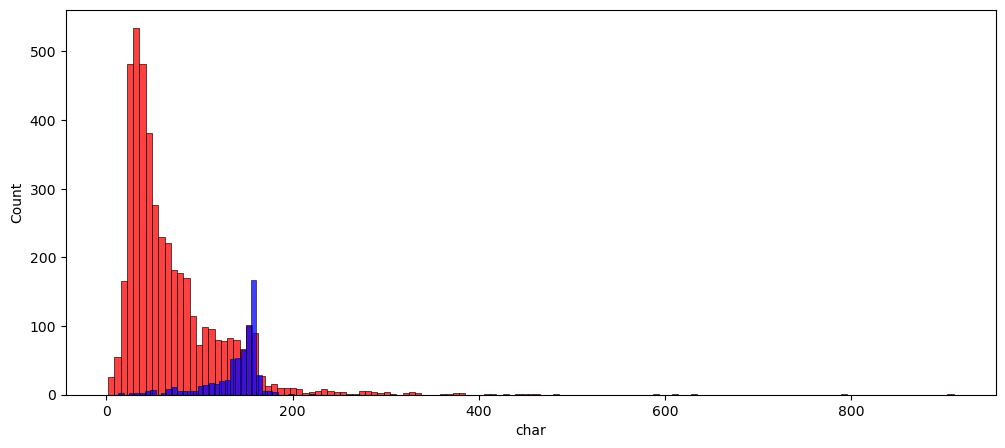

In [20]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.histplot(df["char"][df["Target"]==0],color="red")
sns.histplot(df["char"][df["Target"]==1],color="blue")
plt.show()

<Axes: xlabel='words', ylabel='Count'>

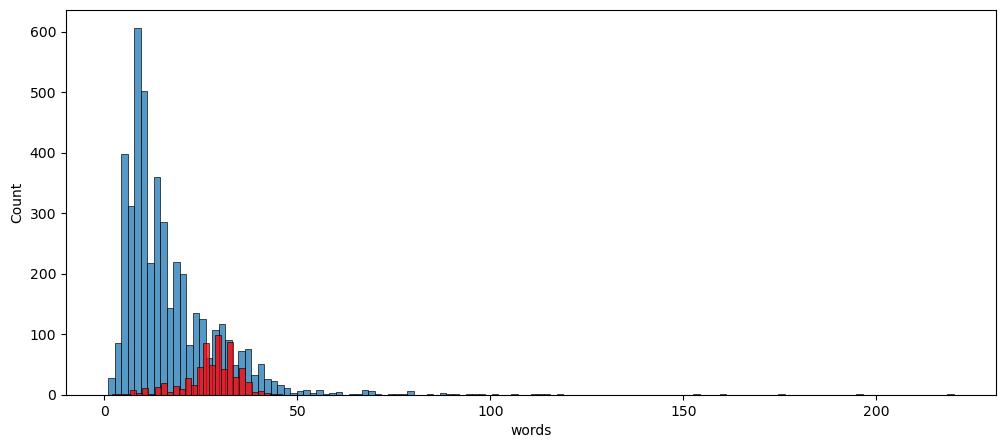

In [21]:
plt.figure(figsize=(12,5))
sns.histplot(df["words"][df["Target"]==0])
sns.histplot(df["words"][df["Target"]==1],color="red")

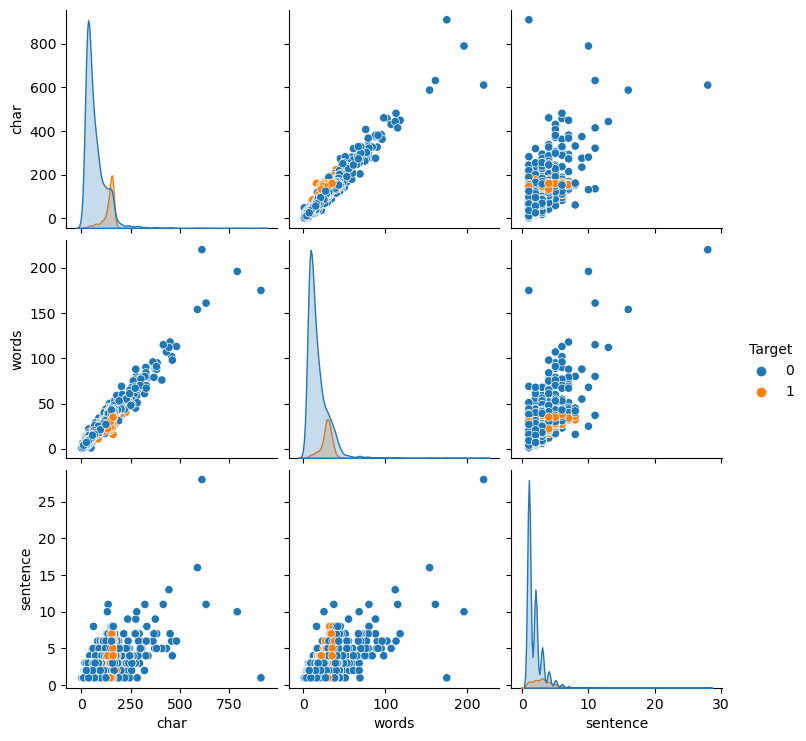

In [22]:

sns.pairplot(df,hue="Target")

In [23]:
nltk.download("stopwords")
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to C:\Users\ABHISHEK
[nltk_data]     RAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [25]:
#text preprocessing
def preprocessing(text):
    #converting to lowercase
    text=text.lower()
    #separting all the words of message
    text=word_tokenize(text)
    y=[]
    #removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)
    #removing stopwords and puntuations
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    #stemming
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [26]:
df["message"]=df["message"].apply(preprocessing)

C:\Users\ABHISHEK RAWAL\AppData\Local\Temp\ipykernel_4100\3787556347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["message"]=df["message"].apply(preprocessing)


In [27]:
df2=df[["Target","message"]]

In [28]:
df2

,Target,message
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah think goe usf live around though
...,...,...
5567,1,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,b go esplanad fr home
5569,0,piti mood suggest
5570,0,guy bitch act like interest buy someth els nex...


In [29]:
from wordcloud import WordCloud

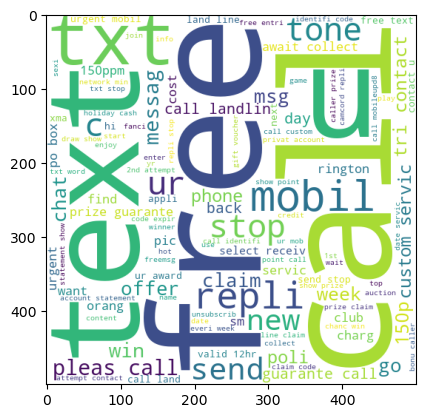

In [30]:
wc=WordCloud(width=500,height=500,background_color="white",min_font_size=10)
spamwc=wc.generate(df2[df2["Target"]==1]["message"].str.cat(sep=" "))
plt.imshow(spamwc)

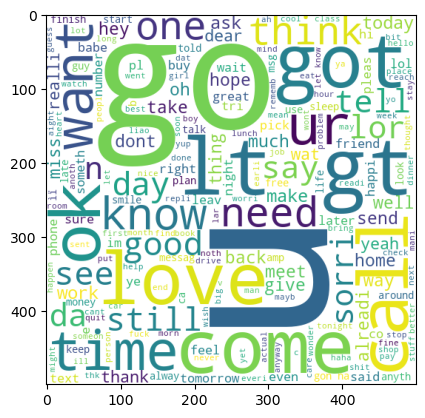

In [31]:
nospam_wc=wc.generate(df[df["Target"]==0]["message"].str.cat(sep=" "))
plt.imshow(nospam_wc)

In [32]:
spam_words=[]
for msg in df2[df2["Target"]==1]["message"].tolist():
    for word in msg.split():
        spam_words.append(word)

In [33]:
len(spam_words)

9939

In [34]:
from collections import Counter

top_spam_words=pd.DataFrame(Counter(spam_words).most_common(40),columns=["words","ct"])
top_spam_words

,words,ct
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


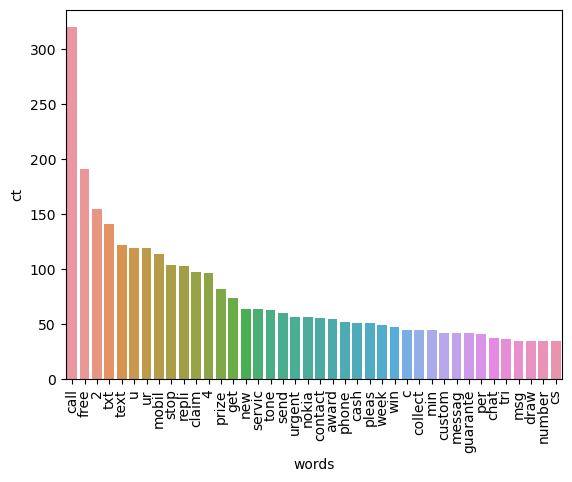

In [35]:
sns.barplot(x=top_spam_words["words"],y=top_spam_words["ct"])
plt.xticks(rotation="vertical")
plt.show()

In [36]:
ham_words=[]
for msg in df2[df2["Target"]==0]["message"].tolist():
    for word in msg.split():
        ham_words.append(word)
not_Spam_words=pd.DataFrame(Counter(ham_words).most_common(40),columns=["words","ct"])

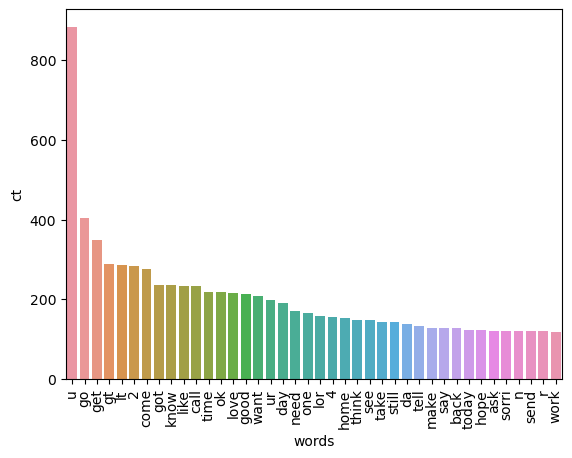

In [37]:
sns.barplot(x=not_Spam_words["words"],y=not_Spam_words["ct"])
plt.xticks(rotation="vertical")
plt.show()

# model

In [38]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer(max_features=3000)
tf=TfidfVectorizer(max_features=3000)

In [39]:
X1=cv.fit_transform(df2["message"]).toarray()
X2=tf.fit_transform(df2["message"]).toarray()

In [40]:
y=df2["Target"]

In [41]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import precision_score,accuracy_score

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

In [44]:
lor=LogisticRegression(solver="liblinear",penalty="l1")
svc=SVC(kernel="sigmoid",gamma=1.0)
rf=RandomForestClassifier(n_estimators=50,max_samples=0.75,bootstrap=True,n_jobs=-1)
knn=KNeighborsClassifier(n_neighbors=5)
ada=AdaBoostClassifier(n_estimators=50,learning_rate=0.7,random_state=42)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
dt=DecisionTreeClassifier(max_depth=5)
xg=XGBClassifier(n_estimators=50,random_state=2)
bg=BaggingClassifier(n_estimators=50, random_state=2)
gn=GaussianNB()
ml=MultinomialNB()
br=BernoulliNB()

In [45]:
clf={
    'lor':lor,
    "svc":svc,
    "rf":rf,
    "knn":knn,
    "ada":ada,
    "gbc":gbc,
    "dt":dt,
    "xg":xg,
    "gn":gn,
    "ml":ml,
    "br":br
}

In [46]:
# MultinomialNB on X1
print(cross_val_score(ml,X1,y,cv=5,scoring='accuracy').mean())
print(cross_val_score(ml,X1,y,cv=5,scoring="precision").mean())


0.9785247378108494
0.9193058901184348


In [47]:
# trying multinomial on X2
print(cross_val_score(ml,X2,y,cv=5,scoring='accuracy').mean())
print(cross_val_score(ml,X2,y,cv=5,scoring="precision").mean())


0.9729145172555194
0.9923809523809524


In [48]:

precision=[]
accuracy=[]
def prediction(clf,X,y):
    for j,i in clf.items():
        a=cross_val_score(i,X,y,scoring="accuracy",cv=5).mean()
        b=cross_val_score(i,X,y,scoring="precision",cv=5).mean()
        accuracy.append(a)
        precision.append(b)
        print(j)
        print("accuracy_score",a)
        print("precision_score",b)

In [49]:
prediction(clf,X1,y)

lor
accuracy_score 0.9725261721039358
precision_score 0.9635888587421663
svc
accuracy_score 0.9257077375056406
precision_score 0.7229630353567645
rf
accuracy_score 0.9694317690301295
precision_score 0.9859624296590533
knn
accuracy_score 0.9189403457657459
precision_score 1.0
ada
accuracy_score 0.9609183220643335
precision_score 0.9469172811116296
gbc
accuracy_score 0.9479566940855071
precision_score 0.9602792948442929
dt
accuracy_score 0.9289993090676909
precision_score 0.9000458142564611
xg
accuracy_score 0.971560552071767
precision_score 0.9655905817346495
gn
accuracy_score 0.868639911920174
precision_score 0.48872933200029217
ml
accuracy_score 0.9785247378108494
precision_score 0.9193058901184348
br
accuracy_score 0.9792989939351496
precision_score 0.9776664677183836


In [50]:
df3_X1=pd.DataFrame({"Algo":clf.keys(),"precision":precision,"accuracy":accuracy}).sort_values(by="precision",ascending=False)

In [51]:
df3_X1

,Algo,precision,accuracy
3,knn,1.000000,0.918940
2,rf,0.985962,0.969432
10,br,0.977666,0.979299
7,xg,0.965591,0.971561
0,lor,0.963589,0.972526
5,gbc,0.960279,0.947957
4,ada,0.946917,0.960918
9,ml,0.919306,0.978525
6,dt,0.900046,0.928999
1,svc,0.722963,0.925708


In [52]:
prediction(clf,X2,y)


lor
accuracy_score 0.9531808164235921
precision_score 0.9311019091847266
svc
accuracy_score 0.9740748715970646
precision_score 0.9600894728167455
rf
accuracy_score 0.9707857342138819
precision_score 0.9822501028383381
knn
accuracy_score 0.9113957019890986
precision_score 0.9894736842105264
ada
accuracy_score 0.9611121201510688
precision_score 0.9493431533443648
gbc
accuracy_score 0.9502798369474647
precision_score 0.944986055958665
dt
accuracy_score 0.9353843474809057
precision_score 0.8207223099284855
xg
accuracy_score 0.9669178239938884
precision_score 0.9476694694044937
gn
accuracy_score 0.8653505872924627
precision_score 0.48087632351639664
ml
accuracy_score 0.9729145172555194
precision_score 0.9923809523809524
br
accuracy_score 0.9792989939351496
precision_score 0.9776664677183836


In [57]:
df3_X2=pd.DataFrame({"Algo":clf.keys(),"precision":precision[11:],"accuracy":accuracy[11:]}).sort_values(by="precision",ascending=False)

In [58]:
df3_X2

,Algo,precision,accuracy
9,ml,0.992381,0.972915
3,knn,0.989474,0.911396
2,rf,0.982250,0.970786
10,br,0.977666,0.979299
1,svc,0.960089,0.974075
4,ada,0.949343,0.961112
7,xg,0.947669,0.966918
5,gbc,0.944986,0.950280
0,lor,0.931102,0.953181
6,dt,0.820722,0.935384


# selecting MultinomialNb,RandomForest,BernoulliNB

In [161]:
rf2=RandomForestClassifier(n_estimators=100,max_samples=0.75,bootstrap=True,n_jobs=-1)
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import plot_tree

In [87]:
xtrain,xtest,ytrain,ytest=train_test_split(X2,y,test_size=0.3,random_state=20)

In [162]:
rf2.fit(xtrain,ytrain)
ypred=rf2.predict(xtest)
print(accuracy_score(ytest,ypred))
print(precision_score(ytest,ypred))

0.9752513534416086
0.9925373134328358


In [169]:
esti=[
    ("mnb",MultinomialNB()),
    ("rf",RandomForestClassifier(n_estimators=100,max_samples=0.75,bootstrap=True,n_jobs=-1)),
    ("bnb",BernoulliNB())
    
    
]

In [170]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=esti,voting="soft")



In [171]:
cross_val_score(vc,X2,y,scoring="accuracy",cv=10).mean()

0.982588502541496

In [172]:
cross_val_score(vc,X2,y,scoring="precision",cv=10).mean()

0.9964285714285716

In [167]:
# so clearly soft voting is doing better

In [173]:
import pickle as pkl
pkl.dump(tf,open("Vectorizer.pkl","wb"))
pkl.dump(vc,open("model.pkl","wb"))
pkl.dump(preprocessing,open('preprocesser.pkl',"wb"))